# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.30 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [9]:
from collections import deque
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from src.tennis_agent import Agent

%load_ext autoreload
%autoreload 2

Cuda available using device 'cuda:0' 


In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
# for i in range(5):                                         # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
def tennis_ddpg(agent, n_episodes=500, max_t=300, print_every=10, target_score=30):

    max_scores = []
    scores_window = deque(maxlen=100)
    scores_deque = deque(maxlen=print_every)
    for i_episode in range(1, n_episodes+1):
        
        
        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        
        
        agent.reset()
        for t in range(max_t):

            actions = agent.act(states, add_noise=True)
            

            # print(f"\r{np.array_equal(((action > -1) & (action < 1)), np.array([True] * 4))}", end="")
#             action = np.clip(action, -1, 1)

            env_info = env.step(actions)[brain_name]

            rewards = env_info.rewards
            dones = env_info.local_done
            next_states = env_info.vector_observations
            
            for state, action, reward, next_state, done in zip(states, actions, rewards,next_states,dones):
                agent.step(state, action, reward, next_state, done)

            # print('\rReward - {}'.format(reward), end="")
            states = next_states
            scores += rewards
            if np.any(dones):
                break
        scores_deque.append(np.max(scores))
        scores_window.append(np.max(scores))
        max_scores.append(np.max(scores))
        # break

#         print('\rEpisode {}\tScore this episode: {:.2f}'.format(i_episode, score), end="")
        print('\rEpisode {}\tScore this episode: {:.2f}'.format(i_episode, np.max(scores)), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score of last 10 episode: {:.2f}\tMax score till now: {:.2f}'.format(i_episode, np.mean(scores_deque), max(max_scores)))
        if np.mean(scores_window) >= target_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break

    return max_scores

In [11]:
agent = Agent(state_size=24, action_size=2, random_seed=0, fc1_units=128, fc2_units=128, fcs1_units=128)

Using device as - cuda:0
Using hyperparameters - 
BUFFER_SIZE = 100000
BATCH_SIZE = 128
GAMMA = 0.99
TAU = 0.001
LR_ACTOR = 0.0001
LR_CRITIC = 0.001
WEIGHT_DECAY = 1e-06
UPDATE_EVERY = 1
EPSILON_DECAY = 1e-06
EPS_START = 1.0
EPS_END = 0
EPS = 1.0


In [12]:
max_scores = tennis_ddpg(agent, max_t=1000, n_episodes=2000, print_every=10, target_score=0.5)

Episode 10	Average Score of last 10 episode: 0.01	Max score till now: 0.10
Episode 20	Average Score of last 10 episode: 0.01	Max score till now: 0.10
Episode 30	Average Score of last 10 episode: 0.00	Max score till now: 0.10
Episode 40	Average Score of last 10 episode: 0.01	Max score till now: 0.10
Episode 50	Average Score of last 10 episode: 0.02	Max score till now: 0.10
Episode 60	Average Score of last 10 episode: 0.00	Max score till now: 0.10
Episode 70	Average Score of last 10 episode: 0.00	Max score till now: 0.10
Episode 80	Average Score of last 10 episode: 0.01	Max score till now: 0.10
Episode 90	Average Score of last 10 episode: 0.00	Max score till now: 0.10
Episode 100	Average Score of last 10 episode: 0.03	Max score till now: 0.10
Episode 110	Average Score of last 10 episode: 0.05	Max score till now: 0.10
Episode 120	Average Score of last 10 episode: 0.04	Max score till now: 0.10
Episode 130	Average Score of last 10 episode: 0.08	Max score till now: 0.10
Episode 140	Average S

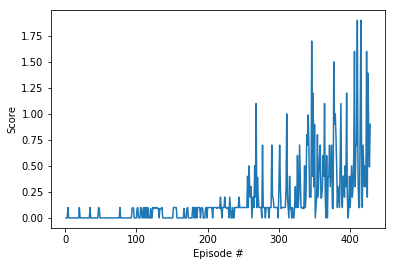

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(max_scores)+1), max_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Run a smart agent

In [ ]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

In [ ]:
agent = Agent(state_size=24, action_size=2, random_seed=0, fc1_units=128, fc2_units=128, fcs1_units=128)


### load weights ####
actor_dict = torch.load('./data/checkpoint_actor.pth', map_location={'cuda:0': 'cpu'})
critic_dict = torch.load('./data/checkpoint_critic.pth', map_location={'cuda:0': 'cpu'})

agent.actor_local.load_state_dict(actor_dict)
agent.actor_target.load_state_dict(actor_dict)

agent.critic_local.load_state_dict(critic_dict)
agent.critic_target.load_state_dict(critic_dict)


####################

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations
scores = np.zeros(num_agents)
        
agent.reset() # set the noise to zero

for t in range(1000):
    actions = agent.act(states, add_noise=False)

    env_info = env.step(actions)[brain_name]
    rewards = env_info.rewards
    dones = env_info.local_done
    next_states = env_info.vector_observations
    
    for state, action, reward, next_state, done in zip(states, actions, rewards,next_states,dones):
        agent.step(state, action, reward, next_state, done)

    # print('\rReward - {}'.format(reward), end="")
    states = next_states
    scores += rewards
    if np.any(dones):
        break

env.close()
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))